# Exploratory data analysis (EDA) in banking with Pandas framework
1. Explore a banking dataset with Pandas framework.
2. Build pivot tables.
3. Visualize the dataset with various plot types.

## Outline
* Materials and methods
* General part
  * Libraries import
  * Dataset exploration
  * Pivot tables
  * Visualization in Pandas
* Tasks
* Authors


## Materials and methods
The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

> This dataset is publicly available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

During the work, the task of preliminary analysis of a positive response (term deposit) to direct calls from a bank is solved. In essence, the task is a matter of bank scoring, i.e. according to the characteristics of a client (potential client), their behavior is predicted (loan default, a wish to make a deposit, etc.).

In this lesson, we will try to give answers to a set of questions that may be relevant when analyzing banking data:

1. What is the share of clients attracted in our source data?
2. What are the mean values ​​of numerical features among the attracted clients?
3. What is the average call duration for the attracted clients?
4. What is the average age among the attracted and unmarried clients?
5. What is the average age and call duration for different types of client employment?

In addition, we will make a visual analysis in order to plan marketing banking campaigns more effectively.


[Pandas](http://pandas.pydata.org/) is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like .csv, .tsv, or .xlsx. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with Matplotlib and Seaborn, Pandas provides a wide range of opportunities for visual analysis of tabular data.


## Libraries import 


Download data using a URL.


In [26]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2024-07-31 16:31:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'bank-additional.zip.4'

     0K .......... .......... .......... .......... ..........  130K
    50K .......... .......... .......... .......... .......... 1.28M
   100K .......... .......... .......... .......... ..........  317K
   150K .......... .......... .......... .......... .......... 19.4M
   200K .......... .......... .......... .......... ..........  263K
   250K .......... .......... .......... .......... .......... 15.1M
   300K .......... .......... .......... .......... ..........  264K
   350K .......... .......... .......... .......... .......... 9.18M
   400K .......... .......... .......... ....                  1.26M=1.0s

2

Alternative URL for the dataset downloading.

In [27]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip

--2024-07-31 16:31:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: 'bank-additional.zip.5'

     0K .......... .......... .......... .......... .......... 11% 14.7K 26s
    50K .......... .......... .......... .......... .......... 23% 23.0K 19s
   100K .......... .......... .......... .......... .......... 34% 25.8K 14s
   150K .......... .......... .......... .......... .......... 46% 48.3K 10s
   200K .......... .......... .......... .......... .......... 57% 33.3K 7s
   250K .......... .......... .......... ..

Unzipping to a folder. It is a good idea to apply -o and -q when unzipping to quiet the process and overwrite any existing folders.

In [28]:
import zipfile
import os

# Đảm bảo rằng file ZIP tồn tại
zip_file = 'bank-additional.zip'
destination_folder = 'path/to/destination/folder'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Unzipping completed.")


Unzipping completed.


Import the libraries necessary for this lab. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings('ignore')

Further specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [30]:

pd.options.display.float_format = '{:.2f}'.format


## Dataset exploration


In this section you will explore the sourse dataset.


Let's read the data and look at the first 5 rows using the `head` method. The number of the output rows from the dataset is determined by the `head` method parameter.


In [31]:

df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
print(df.head(5))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent         1.10   
1   may         mon  ...         1    999         0  nonexistent         1.10   
2   may         mon  ...         1    999         0  nonexistent         1.10   
3   may         mon  ...         1    999         0  nonexistent         1.10   
4   may         mon  ...         1    999         0  nonexistent         1.10   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### Let's look at the dataset size, feature names and their types


In [32]:
df.shape

(41188, 21)

The dataset contains 41188 objects (rows), for each of which 21 features are set (columns), including 1 target feature (`y`).


### Attributing information


 Output the column (feature) names:


In [33]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

1. `age` - client's age in years (numeric)
2. `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3. `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4. `education` - client's education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5. `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6. `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7. `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8. `contact` - contact communication type (categorical: `cellular`, `telephone`)
9. `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`) 
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`) 
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed and for this client during this campaign (numeric, includes the last contact) 
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted) 
14. `previous` - number of contacts performed for this client before this campaign (numeric) 
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric) 
17. `cons.price.idx` - consumer price index, monthly indicator (numeric) 
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric) 
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric) 
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)


To see the general information on all the DataFrame features (columns), we use the **`info`** method:


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As you can see, the dataset is full, no pass (`non-null`), so there is no need to fill the gaps. The dataset contains 5 integer (`int64`), 5 real (`float64`) and 11 categorical and binary (`object`) features.


Method **`describe`** shows the main statistical characteristics of the dataset for each numerical feature (`int64` and `float64` types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.


In [35]:
print(df.describe())

           age  duration  campaign    pdays  previous  emp.var.rate  \
count 41188.00  41188.00  41188.00 41188.00  41188.00      41188.00   
mean     40.02    258.29      2.57   962.48      0.17          0.08   
std      10.42    259.28      2.77   186.91      0.49          1.57   
min      17.00      0.00      1.00     0.00      0.00         -3.40   
25%      32.00    102.00      1.00   999.00      0.00         -1.80   
50%      38.00    180.00      2.00   999.00      0.00          1.10   
75%      47.00    319.00      3.00   999.00      0.00          1.40   
max      98.00   4918.00     56.00   999.00      7.00          1.40   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count        41188.00       41188.00   41188.00     41188.00  
mean            93.58         -40.50       3.62      5167.04  
std              0.58           4.63       1.73        72.25  
min             92.20         -50.80       0.63      4963.60  
25%             93.08         -42.70       1.

The `Mean` row shows the feature average, `STD` is an RMS (Root Mean Square) deviation, `min`,` max` - the minimum and maximum values, `25%`, `50%`, `75% `- quarters that split the dataset (or part of it) into four groups containing approximately an equal number of observations (rows). For example, the duration (`duration`) of about a quarter of calls to customers is around 100 seconds.


In general, according to the data, it is impossible to say that there are outliers in the data. However, such an inspection is not enough, it is desirable to still see the charts of the target feature dependence from each input feature. We will do it later when we visualize features and dependencies.


To see the statistics on non-numeric features, you need to explicitly specify the feature types by the `include` parameter. You can also set `include = all` to output statistics on all the existing features.

In [36]:
print(df.describe(include = ["object"]))

           job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548  


The result shows that the average client refers to administrative staff (`job = admin.`), is married (`marital = married`) and has a university degree (`education = university.degree`).


For categorical (type `object`) and boolean (type `bool`) features you can use the **`value_counts`** method. Let's look at the target feature (`y`) distribution:


In [37]:
df["y"].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

4640 clients (11.3%) of 41188 issued a term deposit, the value of the variable `y` equals `yes`.

Let's look at the client distribution by the variable `marital`. Specify the value of the `normalize = True` parameter to view relative frequencies, but not absolute. 


In [38]:
df["marital"].value_counts(normalize = True)

marital
married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: proportion, dtype: float64

As we can see, 61% (0.61) of clients are married, which must be taken into account when planning marketing campaigns to manage deposit operations.

### Sorting

A `DataFrame` can be sorted by a few feature values. In our case, for example, by `duration` (`ascending = False` for sorting in descending order):


In [39]:
print(df.sort_values(by = "duration", ascending = False).head())

       age          job  marital            education default housing loan  \
24091   33   technician   single  professional.course      no     yes   no   
22192   52  blue-collar  married             basic.4y      no      no   no   
40537   27       admin.   single          high.school      no      no   no   
13820   31   technician  married  professional.course      no      no   no   
7727    37   unemployed  married  professional.course      no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
24091  telephone   nov         mon  ...         1    999         0   
22192  telephone   aug         thu  ...         3    999         0   
40537  telephone   aug         fri  ...         1    999         0   
13820   cellular   jul         thu  ...         1    999         0   
7727   telephone   may         fri  ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
24091  nonexistent        -0.10  

The sorting results show that the longest calls exceed one hour, as the value `duration` is more than 3600 seconds or 1 hour. At the same time, it usually was on Mondays and Thursdays (`day_of_week`) and, especially, in November and August (`month`).


Sort by the column group:


In [40]:
print(df.sort_values(by = ["age", "duration"], ascending = [True, False]).head())

       age      job marital education default  housing     loan   contact  \
38274   17  student  single   unknown      no       no      yes  cellular   
37579   17  student  single  basic.9y      no  unknown  unknown  cellular   
37140   17  student  single   unknown      no      yes       no  cellular   
37539   17  student  single  basic.9y      no      yes       no  cellular   
37558   17  student  single  basic.9y      no      yes       no  cellular   

      month day_of_week  ...  campaign  pdays  previous  poutcome  \
38274   oct         tue  ...         1      2         2   success   
37579   aug         fri  ...         2    999         1   failure   
37140   aug         wed  ...         3      4         2   success   
37539   aug         fri  ...         2    999         2   failure   
37558   aug         fri  ...         3      4         2   success   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
38274        -3.40           92.43       

We see that the youngest customers are at the `age` of 17, and the call `duration` exceeded 3 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

### Application of functions: `apply`, `map` etc.


**Apply the function to each column:**


In [41]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

The oldest client is 98 years old (`age` = 98), and the number of contacts with one of the customers reached 56 (`campaign` = 56).


The `apply` method can also be used to apply the function to each row. To do this, you need to specify the `axis = 1`.


**Apply the function to each column cell**


The `map` can also be used for **the values ​​replacement in a column** by passing it as an argument dictionary in form of `{old_value: new_value} `. 



In [42]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent         1.10   
1   may         mon  ...         1    999         0  nonexistent         1.10   
2   may         mon  ...         1    999         0  nonexistent         1.10   
3   may         mon  ...         1    999         0  nonexistent         1.10   
4   may         mon  ...         1    999         0  nonexistent         1.10   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### Indexing and extracting data


A `DataFrame` can be indexed in many ways. In this regard, consider various ways of indexing and extracting data from the DataFrame with simple question examples.

You can use the code `dataframe ['name']` to extract a separate column. We use this to answer the question: **What is the share of clients attracted in our DataFrame?**


In [43]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


11,3% is a rather bad indicator for a bank, with such a percentage of attracted customers a business can collapse.


Logical indexation by one column of a `DataFrame` is very convenient. It looks like this: `df [p(df['Name']]`, where` p` is a certain logical condition that is checked for each element of the `Name` column. The result of such an indexation is a `DataFrame` consisting only of the rows satisfying the condition `p` by the `Name` column.

We use this to answer the question: **What are the mean values ​​of numerical features among the attracted clients?**


In [49]:
mean_values = df[df["y"] == 1].select_dtypes(include=[np.number]).mean()

In [50]:
print(mean_values)

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64


Thus, the average age of the attracted clients is about 40 (`age` = 40.91), and 2 calls were required to attract them (`campaign` = 2.05).

Combining two previous types of indexation, we will answer the question: **What is the average call duration for the attracted clients**?


In [51]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 13 sec


So, the average duration of a successful call is almost 553 seconds, that is, nearly 10 minutes.

**What is the average age of attracted (`y == 1`) and unmarried (`'marital' == 'single'`) clients?**


In [52]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 31 years


The average age of unmarried attracted clients is 31, which should be considered when working with such clients.


If we need to get the first or last line of the DataFrame, we can use the code `df[:1]` or `df[-1:]`:


In [53]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0


## Pivot tables


Suppose we want to see how observations in our sample are distributed in the context of two features - `y` and `marital`. To do this, we can build **cross tabulation** by the `crosstab` method.




In [57]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


The result shows that the number of attracted married clients is 2532 (`y = 1` for `married`) from the total number.


In [58]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


We see that more than half of the clients (61%, column `married`) are married and have not issued a deposit.


In `Pandas`, **pivot tables** are implemented by the method `pivot_table` with such parameters:

* `values` – a list of variables to calculate the necessary statistics,
* `index` – a list of variables to group data,
* `aggfunc` — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.

Let's find the average age and the call duration for different types of client employment `job`:


In [59]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


The obtained results allow you to plan marketing banking campaigns more effectively.


## Visualization in Pandas


Method **scatter_matrix** allows you to visualize the pairwise dependencies between the features (as well as the distribution of each feature on the diagonal). We will do it for numerical features.

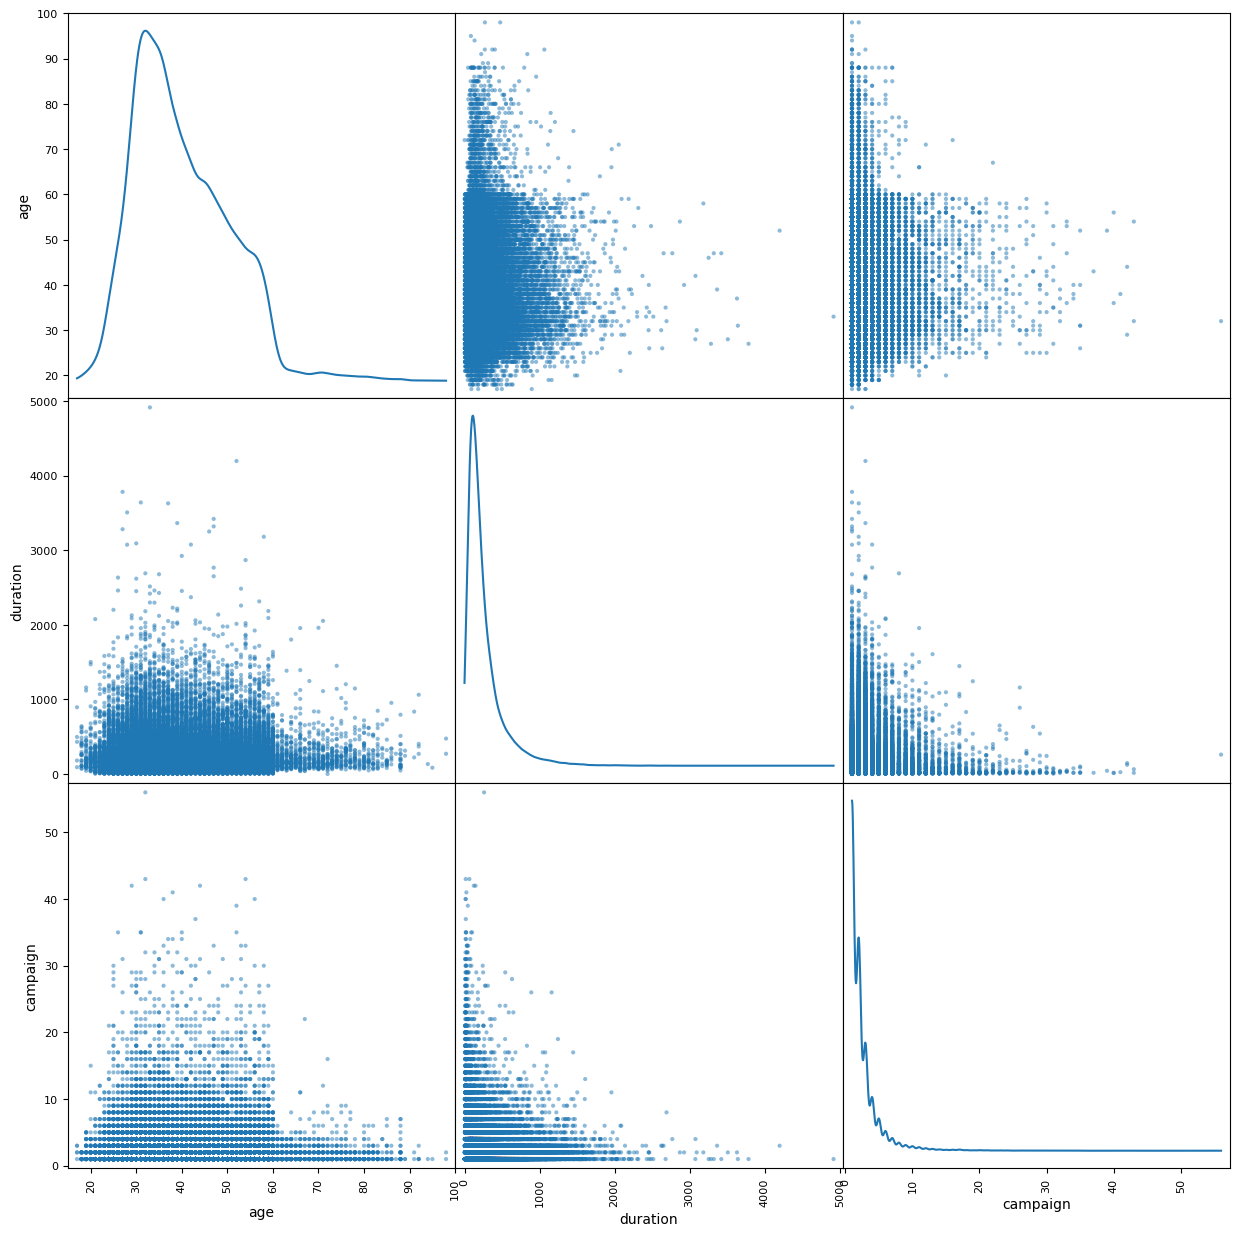

In [60]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other. 
The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the [geometric distribution](https://en.wikipedia.org/wiki/geometric_distribution) is more suitable.


**You can build a separate histogram for each feature:**


<Axes: >

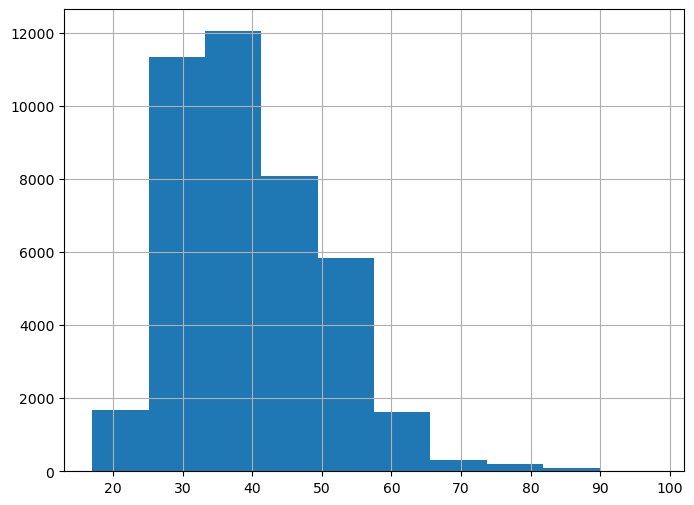

In [61]:
df["age"].hist()

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.


**Or you can build it for all together:**


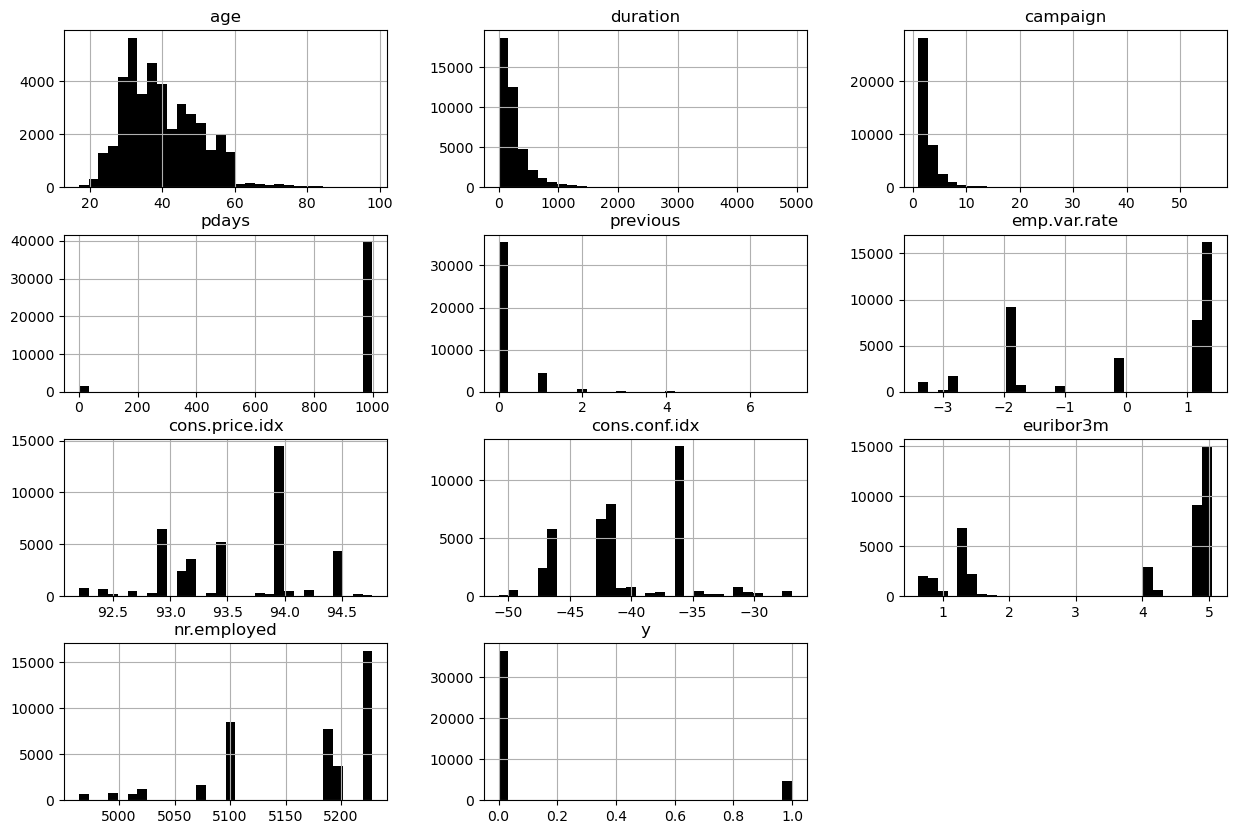

In [62]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.


**Box Plot** ("Box and whisker plot")](https://en.wikipedia.org/wiki/box_plot) is useful too. It allows you to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).


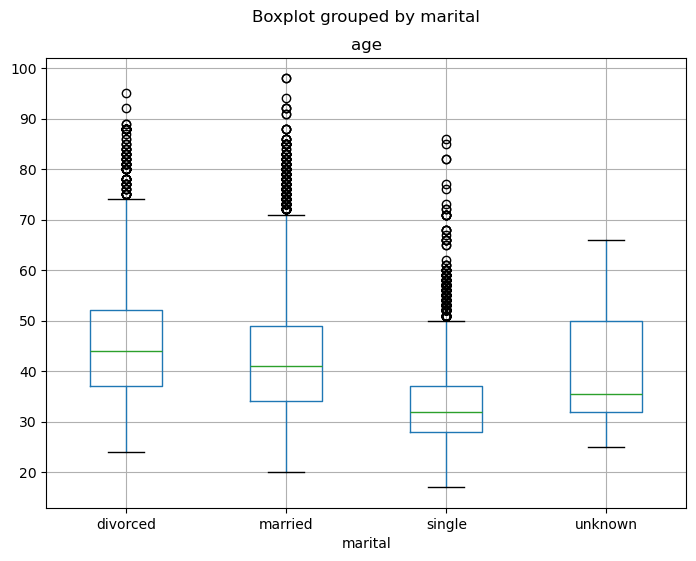

In [63]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

The plot shows that unmarried people are on average younger than divorced and married ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.


**You can do this by data grouping on any other feature:**


<Axes: title={'center': 'age'}, xlabel='[marital, housing]'>

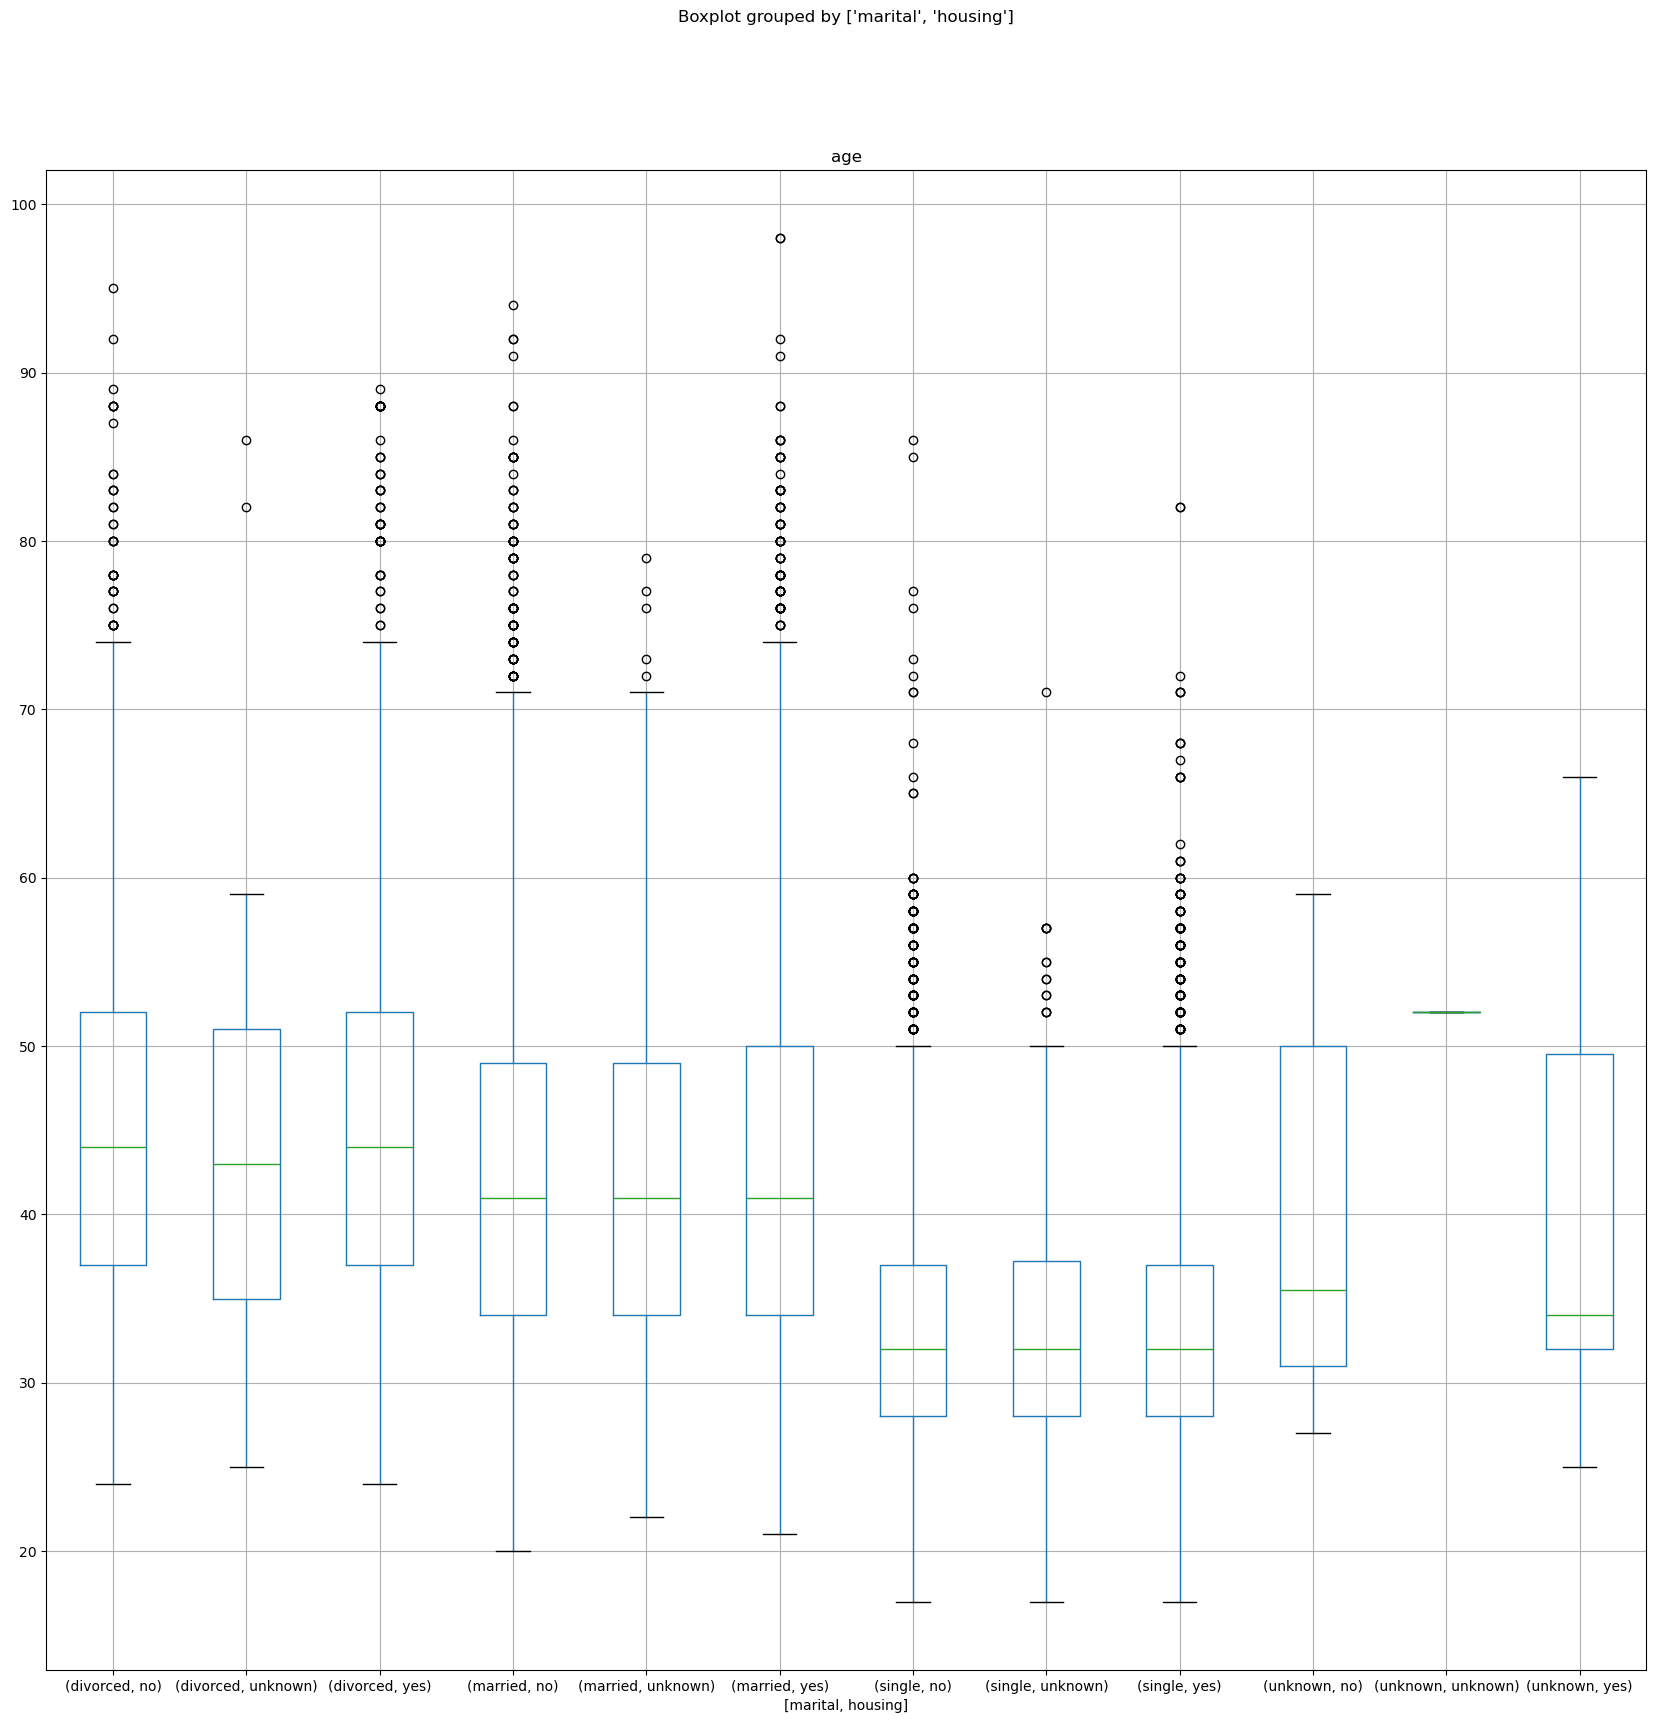

In [64]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 20))

As you can see, age and marital status do not have any significant influence on having a housing loan.


## Tasks
List 10 clients with the largest number of contacts.


In [65]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,...,39,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,...,37,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0


Determine the median age and the number of contacts for different levels of client education.


In [67]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean","count"]
)

mean           count         
                      age campaign    age campaign
education                                         
basic.4y            47.60     2.60   4176     4176
basic.6y            40.45     2.56   2292     2292
basic.9y            39.06     2.53   6045     6045
high.school         38.00     2.57   9515     9515
illiterate          48.50     2.28     18       18
professional.course 40.08     2.59   5243     5243
university.degree   38.88     2.56  12168    12168
unknown             43.48     2.60   1731     1731

Output box plot to analyze the client age distribution by their education level.


<Axes: title={'center': 'age'}, xlabel='[education]'>

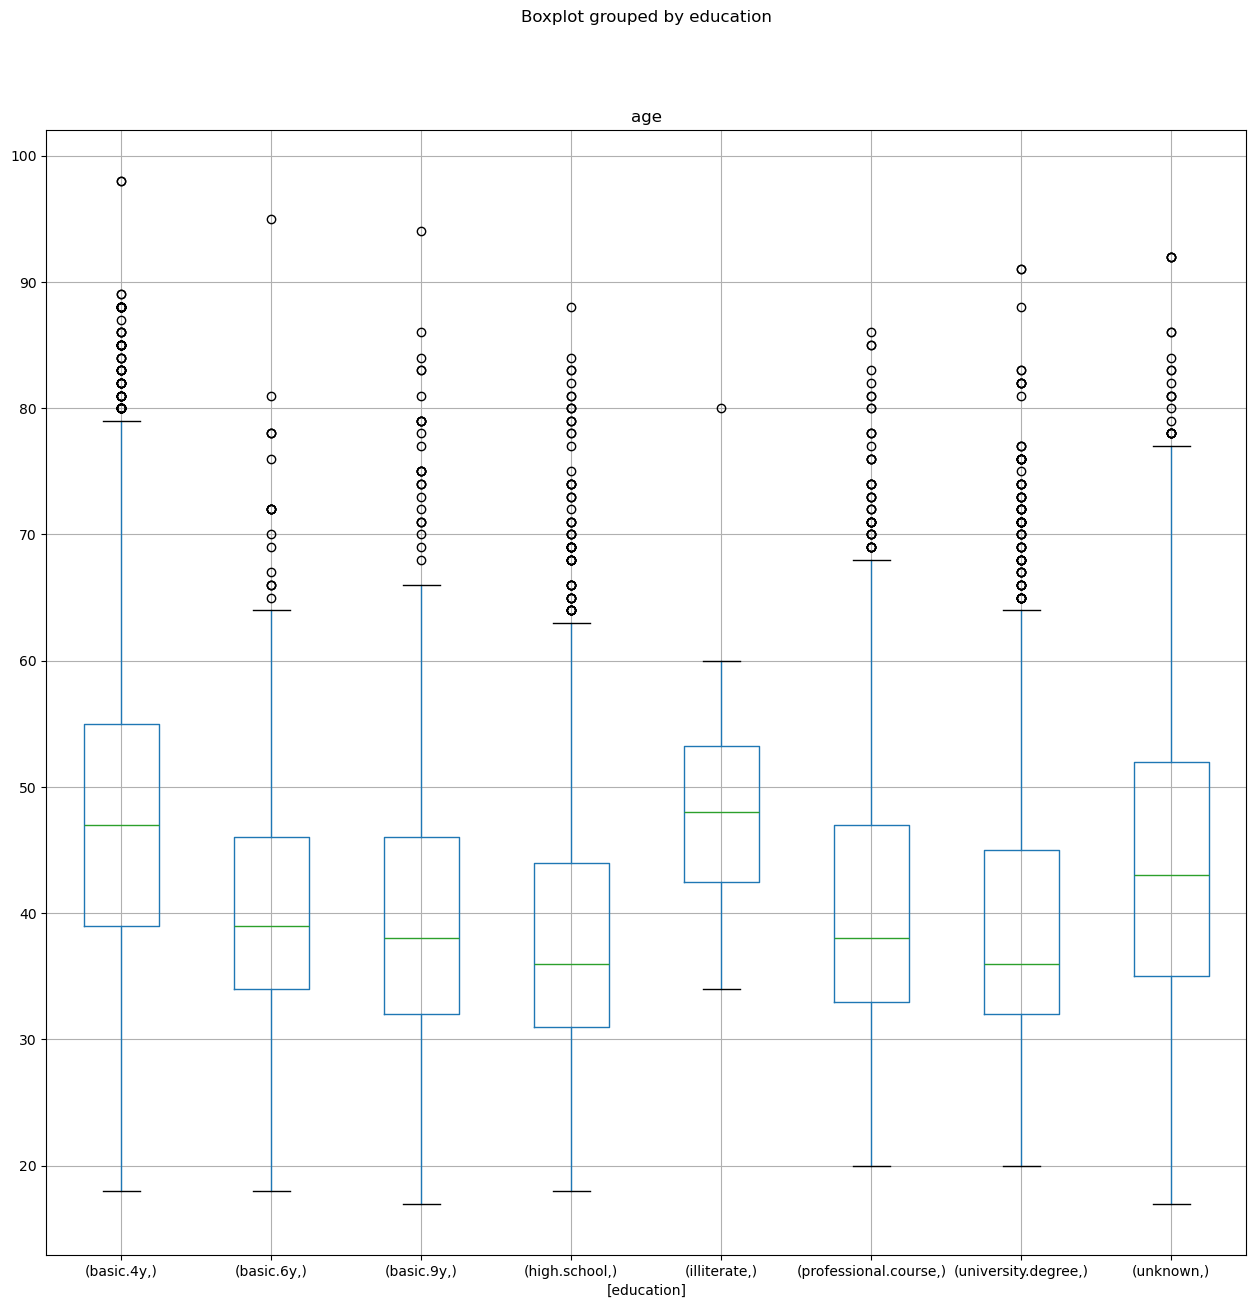

In [69]:
df.boxplot(column = "age",
           by = ["education"],
           figsize = (15, 15))